# Multiple Linear Regression
## Bike Sharing Assignment

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands


## Step 1: Reading and Understanding the Data

Let us first import necessary libraries and read the dataset

In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing day.csv
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# No of rows and columns in data set
df.shape

(730, 16)

In [4]:
# Drop unecessary columns
df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [5]:
# number of null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [6]:
# summary of data set
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [7]:
# Mapping season to its categorical strings
df['season']=df['season'].apply(lambda x: 'spring' if x==1 else 'summer' if x==2 else 'fall' if x==3 else 'winter')
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [8]:
# Mapping weathersit to its categorical strings
df['weathersit']=df['weathersit'].apply(lambda x: 'Clear' if x==1 else 'Mist' if x==2 else 'Light_Snow' if x==3 else 'Heavy_rain')
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
# Mapping month to its categorical strings
df['mnth']=df['mnth'].apply(lambda x: 'Jan' if x==1 else 'Feb' if x==2 else 'Mar' if x==3 else 'Apr' if x==4 else 'May' if x==5
                            else 'Jun' if x==6 else 'Jul' if x==7 else 'Aug' if x==8 else 'Sep' if x==9 else 'Oct' if x==10
                            else 'Nov' if x==11 else 'Dec')
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
# Mapping weekday to its categorical strings
df['weekday']=df['weekday'].apply(lambda x: 'Sun' if x==0 else 'Mon' if x==1 else 'Tue' if x==2 else 'Wed' if x==3 else 'Thu' if x==4
                                  else 'Fri' if x==5 else 'Sat')
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.

We'll visualise our data using `matplotlib` and `seaborn`.

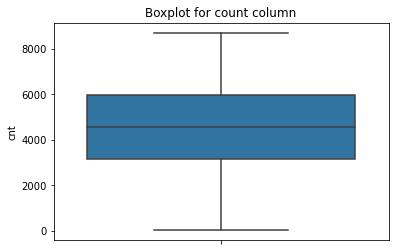

In [11]:
# Boxplot for count column
plt.title('Boxplot for count column')
sns.boxplot(y='cnt',data=df)
plt.show()

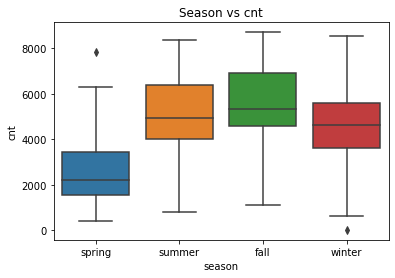

In [12]:
# Boxplot for season vs count column
plt.title('Season vs cnt')
sns.boxplot(x='season',y='cnt',data=df)
plt.show()

From above graph we can see that cnt is high during `fall`

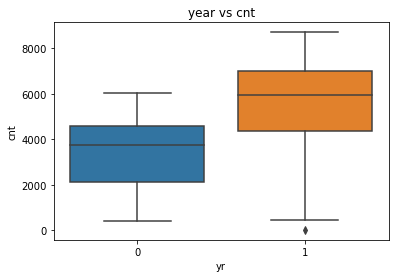

In [13]:
# Boxplot for year vs count column
plt.title('year vs cnt')
sns.boxplot(x='yr',y='cnt',data=df)
plt.show()

From above graph we can see that cnt is high in the year `2019`

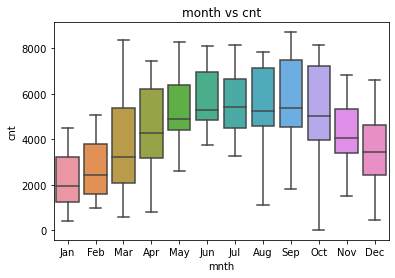

In [14]:
# Boxplot for month vs count column
plt.title('month vs cnt')
sns.boxplot(x='mnth',y='cnt',data=df)
plt.show()

From above graph we can see that cnt is high during `September`

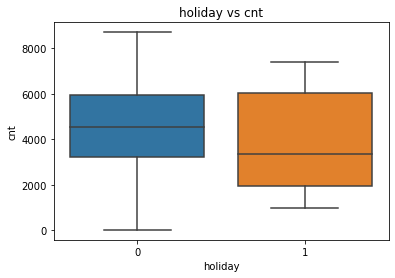

In [15]:
# # Boxplot for holiday vs count column
plt.title('holiday vs cnt')
sns.boxplot(x='holiday',y='cnt',data=df)
plt.show()

From above graph we can see that cnt is high when it isn't a holiday

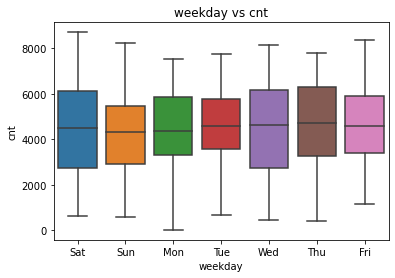

In [16]:
# Boxplot for weekday vs count column
plt.title('weekday vs cnt')
sns.boxplot(x='weekday',y='cnt',data=df)
plt.show()

From above graph we can see that cnt is almost same throught the week.

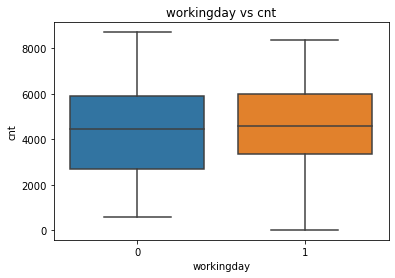

In [17]:
# Boxplot for workingday vs count column
plt.title('workingday vs cnt')
sns.boxplot(x='workingday',y='cnt',data=df)
plt.show()

From above graph we can see that cnt is almost same whether it is a working day or not.

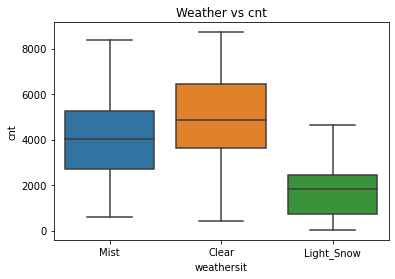

In [18]:
# Boxplot for weather vs count column
plt.title('Weather vs cnt')
sns.boxplot(x='weathersit',y='cnt',data=df)
plt.show()

From above graph we can see that cnt is high when weather is ` Clear, Few clouds, Partly cloudy, Partly cloudy`

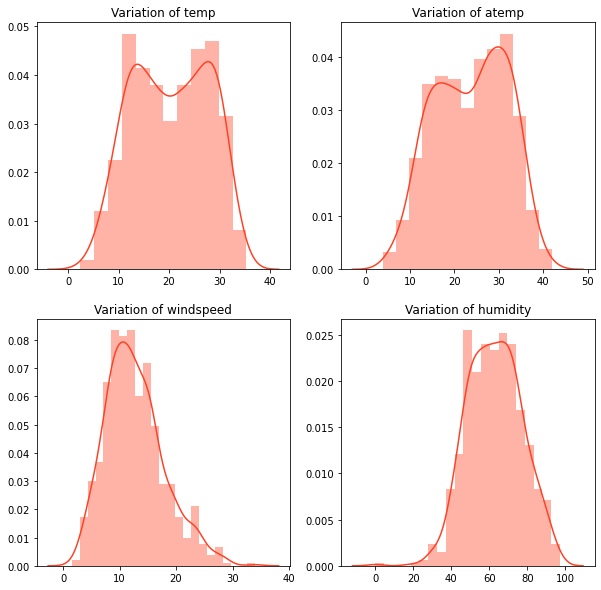

In [19]:
# Variation of temp, atemp, windspeed and humidity
fig,axes=plt.subplots(2,2)
sns.distplot(df[['temp']],hist=True,color='#ff4125',ax=axes[0,0])
axes[0,0].set_title("Variation of temp")
sns.distplot(df[['atemp']],hist=True,color='#ff4125',ax=axes[0,1])
axes[0,1].set_title("Variation of atemp")
sns.distplot(df[['windspeed']],hist=True,color='#ff4125',ax=axes[1,0])
axes[1,0].set_title("Variation of windspeed")
sns.distplot(df[['hum']],hist=True,color='#ff4125',ax=axes[1,1])
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

From above graph we can see that temp, atemp, windspeed and humidity are not normally distributed.

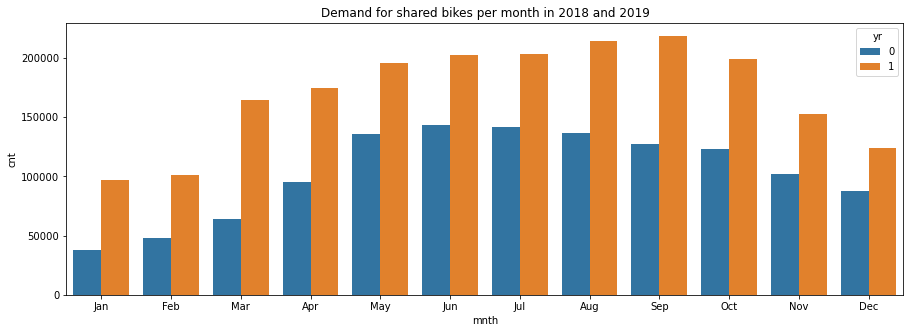

In [20]:
# Demand for shared bikes per month in 2018 and 2019
groupedvalues = df.groupby(['mnth','yr'])['cnt'].sum().reset_index()
groupedvalue = pd.DataFrame(groupedvalues)
groupedvalue['mont_index']=groupedvalue['mnth'].map({'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,
                                                     'Oct':10,'Nov':11,'Dec':12})
groupedvalue= groupedvalue.sort_values(by='mont_index')
plt.figure(figsize=(15,5))
plt.title('Demand for shared bikes per month in 2018 and 2019')
sns.barplot(x="mnth",y='cnt',data=groupedvalue, hue='yr')
plt.show()

From above graph we can see that cnt is high in `September 2019`

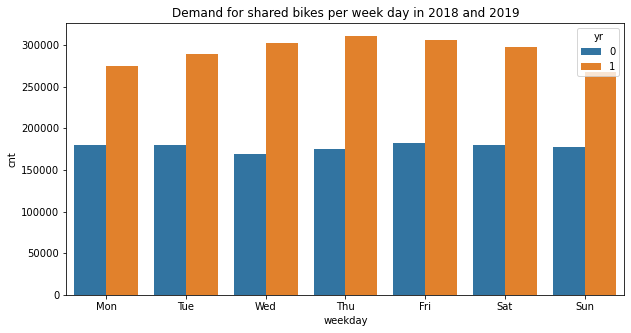

In [21]:
# Demand for shared bikes per week day
groupedvalues = df.groupby(['weekday','yr'])['cnt'].sum().reset_index()
groupedvalue = pd.DataFrame(groupedvalues)
groupedvalue['week_index']=groupedvalue['weekday'].map({'Mon':1,'Tue':2,'Wed':3,'Thu':4,'Fri':5,'Sat':6})
groupedvalue= groupedvalue.sort_values(by='week_index')
plt.figure(figsize=(10,5))
plt.title('Demand for shared bikes per week day in 2018 and 2019')
sns.barplot(x="weekday",y='cnt',data=groupedvalue, hue='yr')
plt.show()

From above graph we can see that cnt is high on `Saturdays`

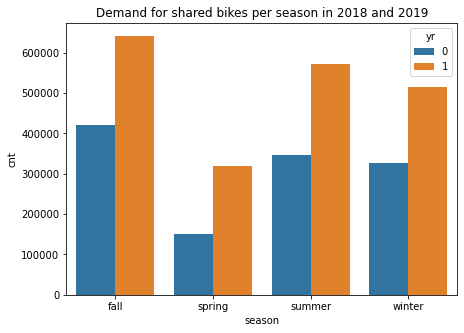

In [22]:
# Demand for shared bikes per season
groupedvalues = df.groupby(['season','yr'])['cnt'].sum().reset_index()
groupedvalue = pd.DataFrame(groupedvalues)
plt.figure(figsize=(7,5))
plt.title('Demand for shared bikes per season in 2018 and 2019')
sns.barplot(x="season",y='cnt',data=groupedvalue, hue='yr')
plt.show()

From above graph we can see that cnt is high in `fall`

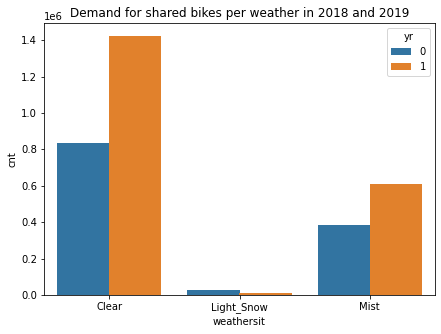

In [23]:
# Demand for shared bikes per weather
groupedvalues = df.groupby(['weathersit','yr'])['cnt'].sum().reset_index()
groupedvalue = pd.DataFrame(groupedvalues)
plt.figure(figsize=(7,5))
plt.title('Demand for shared bikes per weather in 2018 and 2019')
sns.barplot(x="weathersit",y='cnt',data=groupedvalue, hue='yr')
plt.show()

From above graph we can see that cnt is high when weather is ` Clear, Few clouds, Partly cloudy, Partly cloudy`

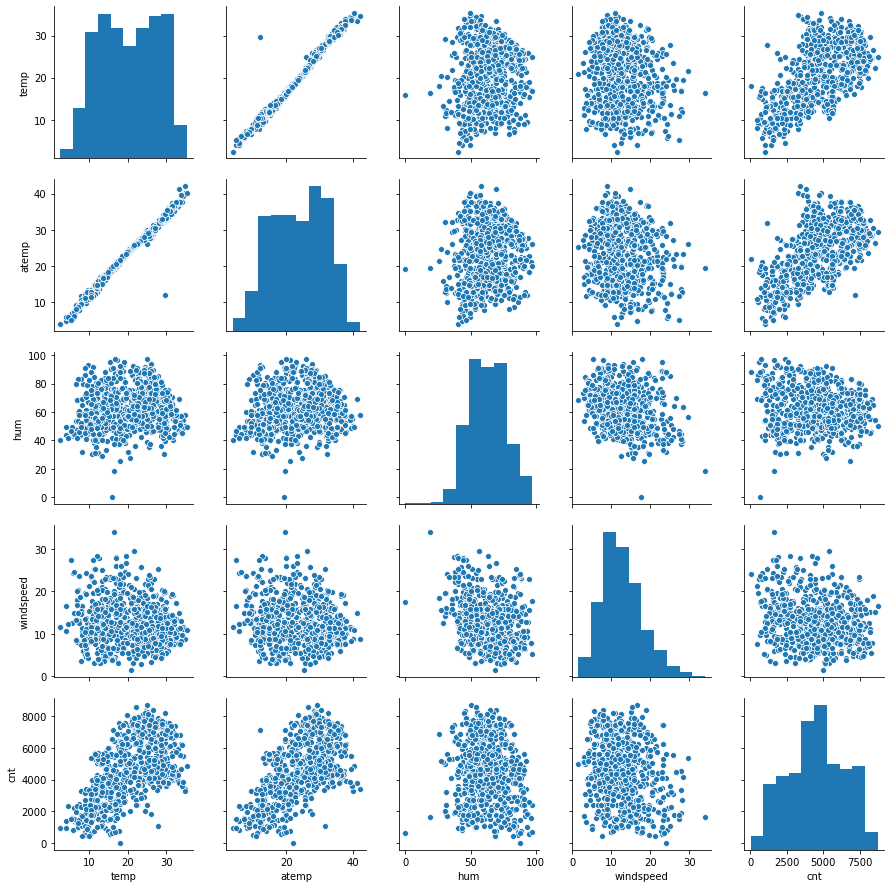

In [24]:
# Pairplot for numerical columns
sns.pairplot(df[['temp','atemp','hum','windspeed','cnt']])
plt.show()

- From above graph we can see that `temp` and `atemp` are highly collinear
- cnt has linear relationship with `temp` and `atemp`

## Step 3: Data Preparation

In [25]:
df2= df.copy()
df2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


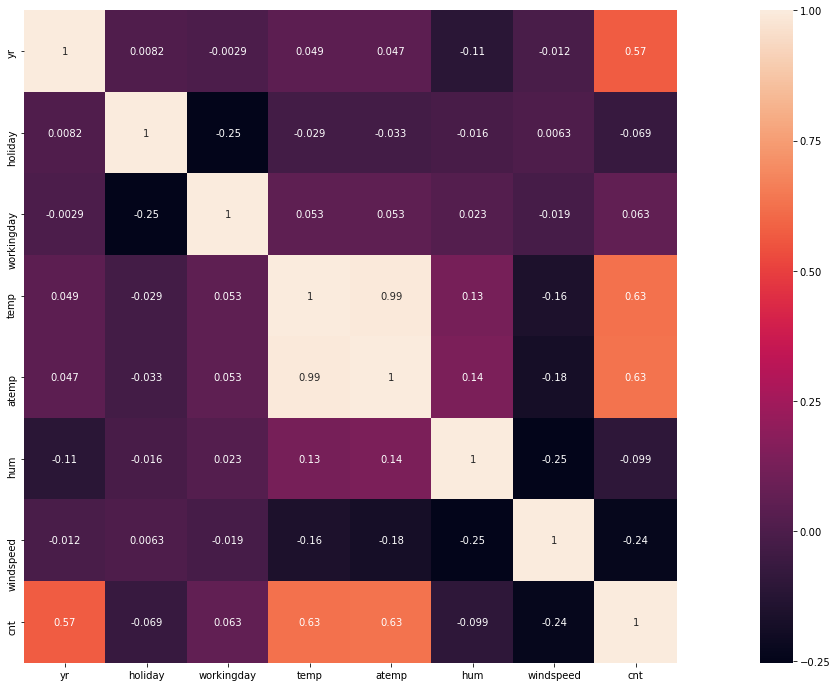

In [26]:
# Heatmap for data set
cor_mat= df2[:].corr()
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,square=True,annot=True,cbar=True)
plt.show()

Since `temp` and `atemp` are highly collinear. Let's drop `atemp`

In [27]:
# Dropping atemp column
df2= df2.drop(columns='atemp',axis=1)
df2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


### Dummy Variables

- The variable `season` has 4 levels.
- The variable `mnth` has 12 levels.
- The variable `weekday` has 7 levels.
- The variable `weathersit` has 4 levels.

We need to convert these levels into integer. 

For this, we will use something called `dummy variables`.

In [28]:
# Creating dummy variables for required categorical columns
dum=pd.get_dummies(df2[['season','mnth','weekday','weathersit']],drop_first=True)
df2=pd.concat([df2,dum],axis=1)
df2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Mist
0,spring,0,Jan,0,Sat,0,Mist,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sun,0,Mist,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [29]:
# Dropping the actual columns after dummifcation
df2= df2.drop(columns=['season','mnth','weekday','weathersit'],axis=1)
df2.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Mist
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Step 4: Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split.

In [30]:
# Train Test Split
df_train, df_test = train_test_split(df2,train_size=0.7,random_state=100)
df_train.shape

(510, 29)

In [31]:
df_test.shape

(220, 29)

### Rescaling the Features 

As we know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation

This time, we will use `MinMax scaling`.

In [32]:
# Scaling down the numerical variables
scaler=MinMaxScaler()
num_vars=['temp','hum','windspeed','cnt']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Mist
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
# Absolute Correlation Values in decreasing order for cnt variable
corr=abs(df_train[df_train.columns[:]].corr()['cnt'][:])
corr=pd.DataFrame(corr.reset_index())
corr.columns = ['Feature','corr']
corr.sort_values(by='corr', ascending=False)

,Feature,corr
6,cnt,1.000000
3,temp,0.645048
0,yr,0.591433
7,season_spring,0.548987
13,mnth_Jan,0.378296
12,mnth_Feb,0.270351
5,windspeed,0.253038
10,mnth_Aug,0.227578
27,weathersit_Light_Snow,0.226678
20,mnth_Sep,0.201639


`temp` and `yr` seem to be promising variables for model building.

### Dividing into X and Y sets for the model building

In [35]:
# creating X_train and y_train
y_train=df_train.pop('cnt')
X_train=df_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels` and RFE from `sklearn`

### RFE
Recursive feature elimination

In [36]:
# RFE to reduce the number of predictors to 15## Building our model
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,15)
rfe=rfe.fit(X_train,y_train)

In [37]:
# column name, support and ranking as per RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 6),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 5),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 7),
 ('weekday_Thu', False, 10),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 11),
 ('weathersit_Light_Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [38]:
# columns which were selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weekday_Sat', 'weathersit_Light_Snow',
       'weathersit_Mist'],
      dtype='object')

In [39]:
# creating X_train_rfe with 15 varibales selected by RFE model
X_train_rfe = X_train[col]

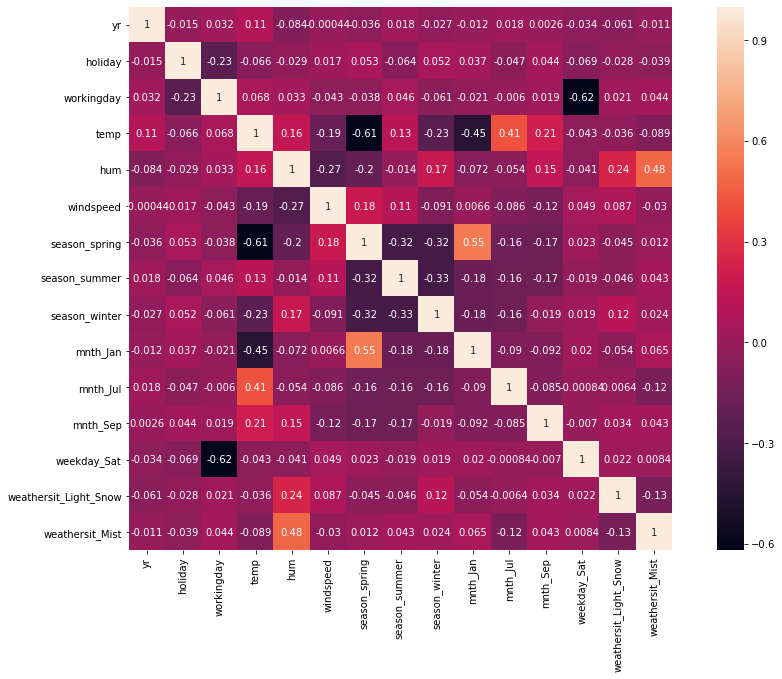

In [40]:
# correlation heatmap for 15 predictor variables
cor_mat= X_train_rfe[:].corr()
plt.figure(figsize = (16, 10))
sns.heatmap(data=cor_mat,square=True,annot=True,cbar=True)
plt.show()

Before we begin bulding models let us predefine the acceptable p values and VIF score.
- Any variable with p value more than 0.020 shall be dropped
- Any variable with VIF score greater than 5 shall be dropped

The above heatmap shows that `season_spring` is highly correlated to `temp`. So let us start by dropping `season_spring`

In [41]:
# Model 1 with 14 predictor
X_train_rfe = X_train_rfe.drop(columns='season_spring')
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     194.8
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          5.98e-191
Time:                        22:38:19   Log-Likelihood:                 516.53
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     495   BIC:                            -939.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.20

In [42]:
# VIF Scores
vif=pd.DataFrame()
X= X_train_rfe
vif['features']=X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
4,hum,19.93
3,temp,12.67
2,workingday,5.10
5,windspeed,3.82
13,weathersit_Mist,2.14
0,yr,2.05
7,season_winter,1.97
11,weekday_Sat,1.92
6,season_summer,1.87
8,mnth_Jan,1.57


`holiday` has high p value so let us drop it.

In [43]:
# Model 2 with 13 predictors
X_train_rfe = X_train_rfe.drop(columns='holiday')
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     207.7
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          4.53e-191
Time:                        22:38:19   Log-Likelihood:                 514.04
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     496   BIC:                            -940.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.19

In [44]:
# VIF Score
vif=pd.DataFrame()
X= X_train_rfe
vif['features']=X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
3,hum,19.59
2,temp,12.66
1,workingday,4.59
4,windspeed,3.76
12,weathersit_Mist,2.13
0,yr,2.05
6,season_winter,1.97
5,season_summer,1.87
10,weekday_Sat,1.80
7,mnth_Jan,1.56


`mnth_Jan` has high p value so let us drop it.

In [45]:
# Model 3 with 12 predictors
X_train_rfe = X_train_rfe.drop(columns='mnth_Jan')
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.7
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          4.14e-191
Time:                        22:38:19   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -996.6
Df Residuals:                     497   BIC:                            -941.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.17

In [46]:
# VIF scores
vif=pd.DataFrame()
X= X_train_rfe
vif['features']=X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
3,hum,16.21
2,temp,10.36
1,workingday,4.54
4,windspeed,3.73
11,weathersit_Mist,2.10
0,yr,2.03
9,weekday_Sat,1.79
5,season_summer,1.76
6,season_winter,1.70
7,mnth_Jul,1.55


`hum` has high VIF score so let us drop it.

In [47]:
# Model 4 with 11 predictors
X_train_rfe = X_train_rfe.drop(columns='hum')
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     231.8
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          6.72e-188
Time:                        22:38:20   Log-Likelihood:                 500.87
No. Observations:                 510   AIC:                            -977.7
Df Residuals:                     498   BIC:                            -926.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.07

In [48]:
# VIF scores
vif=pd.DataFrame()
X= X_train_rfe
vif['features']=X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
2,temp,6.34
1,workingday,4.06
3,windspeed,3.46
0,yr,2.02
4,season_summer,1.76
8,weekday_Sat,1.69
10,weathersit_Mist,1.54
6,mnth_Jul,1.53
5,season_winter,1.47
7,mnth_Sep,1.29


`mnth_Jul` has high p value so let us drop it.

In [49]:
# Model 5 with 10 predictors
X_train_rfe = X_train_rfe.drop(columns='mnth_Jul')
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          3.13e-188
Time:                        22:38:20   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.07

In [50]:
# VIF scores
vif=pd.DataFrame()
X= X_train_rfe
vif['features']=X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,yr,2.02
7,weekday_Sat,1.69
4,season_summer,1.57
9,weathersit_Mist,1.53
5,season_winter,1.40
6,mnth_Sep,1.20
8,weathersit_Light_Snow,1.08


We also saw high correlation between `weekday_Sat` and `workingday`.Let us drop `weekday_Sat`
- The reason for removing `weekday_Sat` is that `workingday` is 0 when it is either Saturday, Sunday or a holiday. So keeping `workingday` and removing `weekday_Sat` makes more sense. 

In [51]:
# Model 6 with 9 predictors- final model
X_train_rfe = X_train_rfe.drop(columns='weekday_Sat')
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     267.4
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          8.61e-185
Time:                        22:38:20   Log-Likelihood:                 487.77
No. Observations:                 510   AIC:                            -955.5
Df Residuals:                     500   BIC:                            -913.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.10

In [52]:
# VIF scores
vif=pd.DataFrame()
X= X_train_rfe
vif['features']=X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
2,temp,4.28
3,windspeed,3.16
1,workingday,2.82
0,yr,2.01
4,season_summer,1.57
8,weathersit_Mist,1.51
5,season_winter,1.38
6,mnth_Sep,1.20
7,weathersit_Light_Snow,1.08


As we see there is no much drop in R^2 and adjusted R^2 values after dropping `weekday_Sat`. So let us keep this as a final model 

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [53]:
# Predicted values for train data set
y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

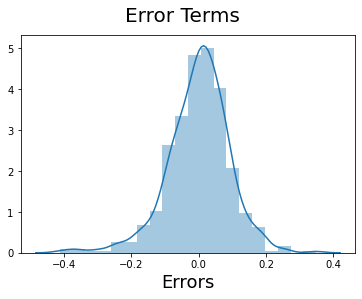

In [54]:
# Dirtibution of error term
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)   

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. sixth model.

#### Applying the scaling on the test sets

In [55]:
# scaling the test data
df_test[num_vars]= scaler.transform(df_test[num_vars])
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [56]:
# creating X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [57]:
# Now let's use our model to make predictions.

# Creating X_test_rfe dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_rfe = sm.add_constant(X_test_new)

In [58]:
# predicting test data set
y_pred = lm.predict(X_test_rfe)

In [59]:
# r^2 on test data set
r2_score(y_true=y_test,y_pred=y_pred)

0.7924783774565808

The R^2 value on train dataset is 0.828 and for test data set is 0.792 which is reasonable

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

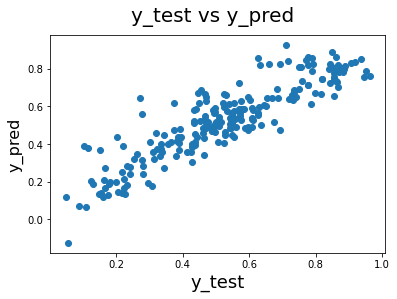

In [60]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)    


We can see that the equation of our best fitted line is:

$ cnt = 0.1060 + 0.5503  \times  temp - 0.2813  \times  weathersit\_Light\_Snow + 0.2325 \times yr - 0.1524 \times windspeed + 0.1294 \times season\_winter + 0.0977 \times mnth\_Sep + 0.0887 \times season\_summer - 0.0779 \times weathersit\_Mist + 0.0236 \times workingday $


The top features are:
-	‘temp’- As temperature increases, the demand for shared bikes also increases. Its coefficient is +0.5503.
-	‘weathersit_Light_Snow’ - When the weather is Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, the demand for shared bikes decreases. Its coefficient is -0.2813
-	‘yr’ -  The demand for the shared bikes increases year by year. The demand in the year 2019 is way more compared to demand in 2018. Its coefficient is +0.2325. However, it is not necessary that the demand for the shared bike will increase every year. For example, during pandemic situations like covid, the demand for the shared bikes will definitely drop.
-	‘windspeed’ – As the wind speed increases, the demand for the shared bikes decrease. Its coefficient is -0.1524.